In [2]:
#IMPLEMENTING LINEAR AND MULTIPLE REGRESSION ALGORITHMS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/Clean_Dataset.csv")
df.dropna(axis=0, inplace=True)
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
91549,91549,Vistara,UK-864,Bangalore,Evening,one,Morning,Delhi,Economy,13.08,38.0,4111.0
91550,91550,Vistara,UK-852,Bangalore,Morning,one,Night,Delhi,Economy,13.50,38.0,4111.0
91551,91551,Vistara,UK-864,Bangalore,Evening,one,Morning,Delhi,Economy,13.58,38.0,4111.0
91552,91552,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,Economy,13.67,38.0,4111.0


displaying first 6 rows

In [4]:
df.head(6)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1.0,5955.0


displaying last 2 rows

In [5]:
df.tail(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
91552,91552,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,Economy,13.67,38.0,4111.0
91553,91553,Vistara,UK-858,Bangalore,Early_Morning,one,Night,Delhi,Economy,14.00,38.0,4111.0


printing shape & size of the data frame

In [6]:
print("SHAPE IS :",df.shape)
print("SIZE IS :",df.size)

SHAPE IS : (91554, 12)
SIZE IS : 1098648


DROP IS UNNAMES COLUMN IS PRESENT IN DATA FRAME

In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

print columns present in data frame

In [8]:
print(df.columns)

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


display info of dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91554 entries, 0 to 91553
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           91554 non-null  object 
 1   flight            91554 non-null  object 
 2   source_city       91554 non-null  object 
 3   departure_time    91554 non-null  object 
 4   stops             91554 non-null  object 
 5   arrival_time      91554 non-null  object 
 6   destination_city  91554 non-null  object 
 7   class             91554 non-null  object 
 8   duration          91554 non-null  float64
 9   days_left         91554 non-null  float64
 10  price             91554 non-null  float64
dtypes: float64(3), object(8)
memory usage: 8.4+ MB


find missing vales if any

In [10]:
df.isna()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
91549,False,False,False,False,False,False,False,False,False,False,False
91550,False,False,False,False,False,False,False,False,False,False,False
91551,False,False,False,False,False,False,False,False,False,False,False
91552,False,False,False,False,False,False,False,False,False,False,False


display summary statistics(mean,std,max,etc..)

In [11]:
df.describe()

,duration,days_left,price
count,91554.000000,91554.000000,91554.000000
mean,11.022150,25.523658,6353.699161
std,7.125745,13.458383,3649.664108
min,1.170000,1.000000,1890.000000
25%,5.670000,14.000000,4020.000000
50%,9.500000,26.000000,5529.000000
75%,15.000000,37.000000,7487.000000
max,41.580000,49.000000,35145.000000


drop the rows containing missing or invalid values

In [12]:
df.dropna(axis=0)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
91549,Vistara,UK-864,Bangalore,Evening,one,Morning,Delhi,Economy,13.08,38.0,4111.0
91550,Vistara,UK-852,Bangalore,Morning,one,Night,Delhi,Economy,13.50,38.0,4111.0
91551,Vistara,UK-864,Bangalore,Evening,one,Morning,Delhi,Economy,13.58,38.0,4111.0
91552,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,Economy,13.67,38.0,4111.0


rename df to df1

In [13]:
df1=df.copy() # Use .copy() to avoid SettingWithCopyWarning
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
91549,Vistara,UK-864,Bangalore,Evening,one,Morning,Delhi,Economy,13.08,38.0,4111.0
91550,Vistara,UK-852,Bangalore,Morning,one,Night,Delhi,Economy,13.50,38.0,4111.0
91551,Vistara,UK-864,Bangalore,Evening,one,Morning,Delhi,Economy,13.58,38.0,4111.0
91552,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,Economy,13.67,38.0,4111.0


II) Exploratory Data Analysis (EDA) & Visualization

In [14]:
#1.Air line popularity: Find Which airline operates the most flights?
df1.groupby('airline')['airline'].count().sort_values(ascending=False)

,airline
airline,
Vistara,27331
Air_India,22091
Indigo,17252
GO_FIRST,12340
AirAsia,7723
SpiceJet,4817


<Axes: xlabel='airline', ylabel='count'>

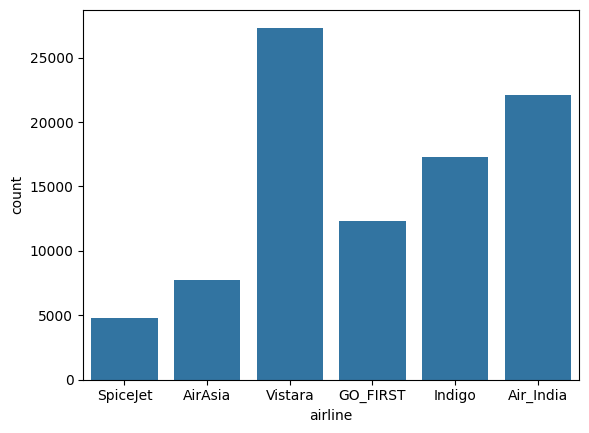

In [15]:
#Find the most frequent airlines and visualize using a countplot
sns.countplot(x='airline',data=df1)

2. Class distribution: What is the most common travel class?


In [16]:
#Group by ['flight', 'airline', 'class'] and count the number of flights by class.
df1.groupby(['flight', 'airline', 'class'])['flight'].count()

,,,flight
flight,airline,class,
6E-128,Indigo,Economy,51
6E-136,Indigo,Economy,145
6E-138,Indigo,Economy,5
6E-148,Indigo,Economy,18
6E-152,Indigo,Economy,105
...,...,...,...
UK-988,Vistara,Economy,644
UK-993,Vistara,Economy,455
UK-994,Vistara,Economy,607


<Axes: ylabel='count'>

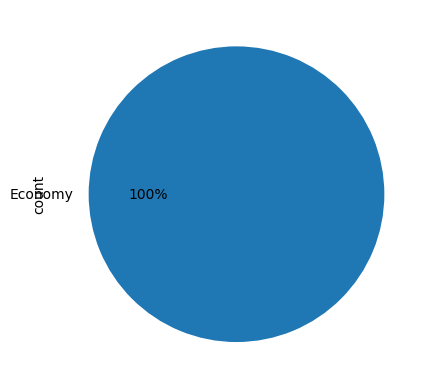

In [17]:
#Visualize class distribution using a pie chart.
df1['class'].value_counts().plot(kind='pie',autopct='%1.0f%%')

3. Price Distribution by Airline: Does price vary with Airlines?


<Axes: xlabel='airline', ylabel='price'>

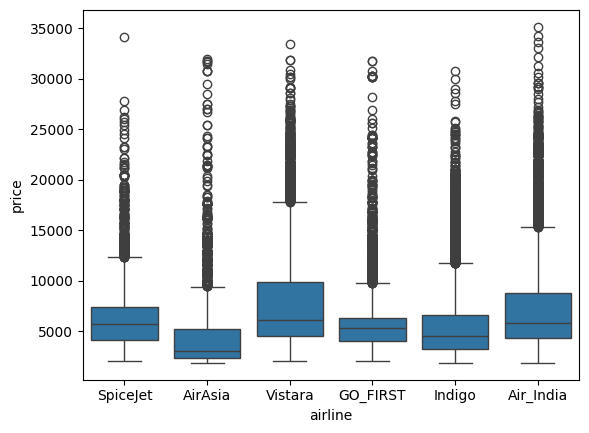

In [18]:
#Use a boxplot to visualize how ticket prices vary with different airlines.
sns.boxplot(x='airline',y='price',data=df1)

4. Class vs Ticket Price



<Axes: xlabel='class', ylabel='price'>

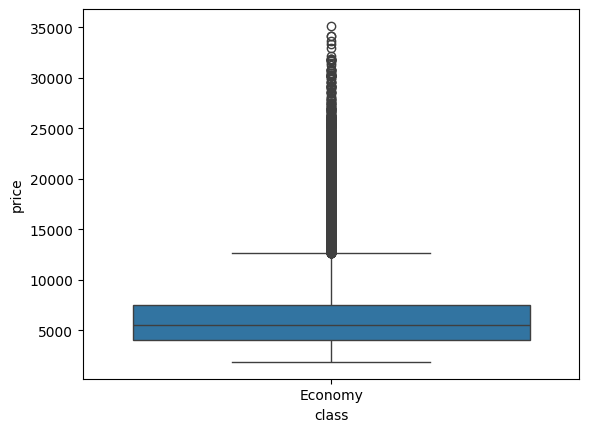

In [19]:
#Compare ticket prices between Economy and Business class.

sns.boxplot(x='class',y='price',data=df1)


5. Stops vs Ticket Price


<Axes: xlabel='stops', ylabel='price'>

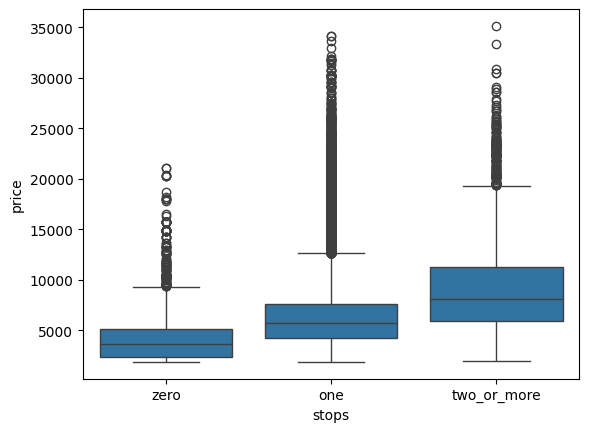

In [20]:
#   Visualize price distribution for flights with different numbers of stops.
sns.boxplot(x='stops',y='price',data=df1)

6. Time of Day vs Price


<Axes: xlabel='departure_time', ylabel='price'>

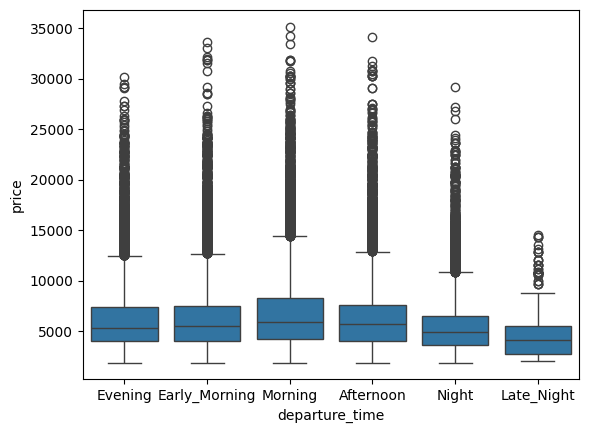

In [21]:
# Use boxplots for both departure_time and arrival_time vs price.
sns.boxplot(x='departure_time',y='price',data=df1)


7. City Pairs vs Price

<Axes: xlabel='source_city', ylabel='price'>

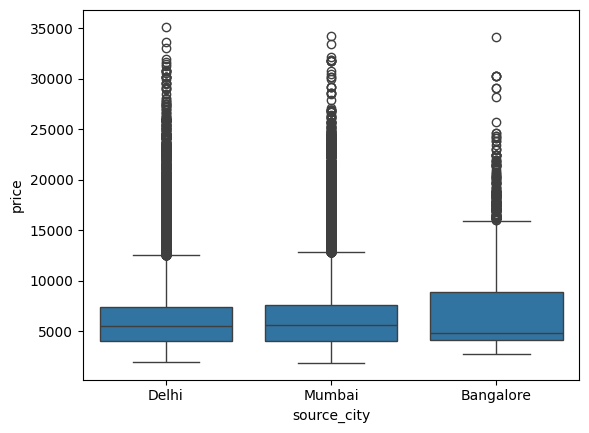

In [22]:
# Visualize price distribution for different source_city and destination_city.
sns.boxplot(x='source_city',y='price',data=df1)


#8. Duration vs Price Based on Class

<Axes: xlabel='duration', ylabel='price'>

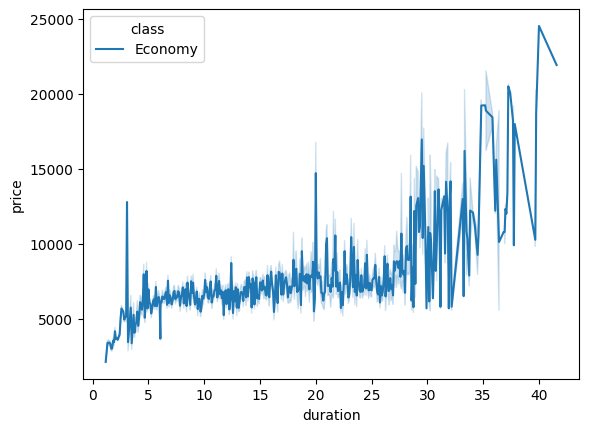

In [23]:
# Use a line plot to analyze how price changes with flight duration, separated by class.
sns.lineplot(x='duration',y='price',hue='class',data=df1)


9. Days Left vs Price


<Axes: xlabel='days_left', ylabel='price'>

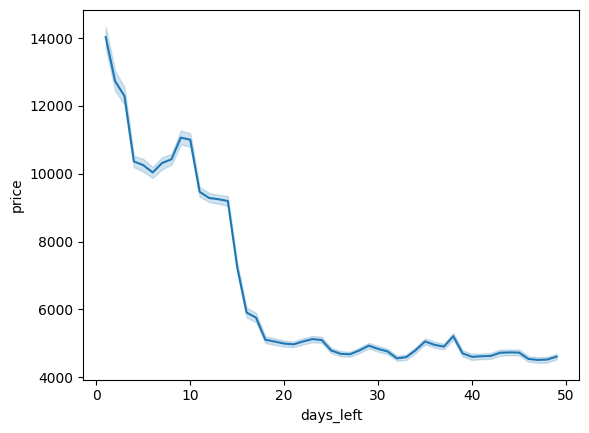

In [24]:
#   Analyze how the number of days left until departure affects ticket price.
# Use line plots: overall and airline-wise.
sns.lineplot(x='days_left',y='price',data=df1)

10. Flight Count by City Pairs

In [25]:
#Count total number of flights between city pairs.
df1.groupby(['source_city','destination_city'])['flight'].count()


source_city  destination_city
Bangalore    Delhi                7489
Delhi        Bangalore           10144
             Chennai              7666
             Hyderabad            6581
             Kolkata              8654
             Mumbai               9982
Mumbai       Bangalore            8706
             Chennai              6767
             Delhi                9801
             Hyderabad            6990
             Kolkata              8774
Name: flight, dtype: int64

11. Average Price by Airline and Route




In [26]:
#Compute average price for each airline for different city pairs.
df1.groupby(['airline','source_city','destination_city'])['price'].mean()


airline  source_city  destination_city
AirAsia  Bangalore    Delhi               5288.046552
         Delhi        Bangalore           5316.400904
                      Chennai             3393.982955
                      Hyderabad           4733.344780
                      Kolkata             4160.479328
                                             ...     
Vistara  Mumbai       Bangalore           7820.204354
                      Chennai             7424.020525
                      Delhi               6921.745548
                      Hyderabad           6231.473280
                      Kolkata             8258.270193
Name: price, Length: 65, dtype: float64

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1])
y = df.iloc[:, -1]

In [28]:
X=df.iloc[:,:-1] #X will contain all columns except the last column
y=df.iloc[:,-1] #y will contain the dependent variable

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=36)

In [30]:
X_train.shape

(61341, 10)

In [31]:
X_test.shape

(30213, 10)

In [32]:
y_train.shape

(61341,)

In [33]:
y_test.shape

(30213,)

FEATURE SCALING (STANDARD SCALE )

In [34]:
# Removed scaling here as scaling is done before splitting
# X_train_scaled = scaler.transform(X_train) # This line is no longer needed
X_train # Display X_train

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
7294,1,451,1,2,2,5,5,0,2.17,37.0
71197,5,940,2,2,0,0,3,0,18.08,8.0
24162,2,576,1,1,0,5,4,0,15.58,24.0
76580,2,572,2,1,0,5,3,0,13.83,44.0
16310,5,870,1,2,2,2,0,0,2.75,32.0
...,...,...,...,...,...,...,...,...,...,...
66522,3,6,2,3,0,4,4,0,6.42,29.0
91386,5,873,0,2,2,5,2,0,2.67,37.0
7329,1,377,1,4,0,0,5,0,3.92,37.0
52136,5,904,2,1,0,0,2,0,9.33,46.0


In [35]:
# Removed scaling here as scaling is done before splitting
# X_test_scaled = scaler.transform(X_test) # This line is no longer needed
X_test # Display X_test

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
68182,5,911,2,0,0,4,4,0,16.83,38.0
72716,5,928,2,4,0,5,3,0,11.00,19.0
55548,1,462,2,5,0,2,0,0,18.75,17.0
60989,2,611,2,1,0,2,0,0,14.33,46.0
66779,3,179,2,0,0,5,4,0,6.75,31.0
...,...,...,...,...,...,...,...,...,...,...
12343,0,702,1,1,1,2,0,0,11.92,14.0
62297,3,178,2,4,0,2,4,0,6.67,6.0
80910,5,834,2,0,1,5,1,0,10.50,27.0
8178,5,929,1,4,2,4,5,0,2.33,41.0


*1.LINEAR REGRESSION

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
lr.coef_

array([ 3.02806741e+02, -2.23330666e-01,  6.59094900e+01, -4.83761092e+01,
       -6.67860259e+02, -1.48594246e+01,  6.78175948e+01,  1.13686838e-13,
        9.25057982e+01, -1.52000485e+02])

In [38]:
lr.intercept_

np.float64(8661.588418459363)

In [39]:
y_pred=_lr=lr.predict(X_test)
y_pred

array([6096.67370114, 8165.39603614, 7871.91144697, ..., 6314.1413271 ,
       2768.0013697 , 6276.558007  ])

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse_lr=mean_squared_error(y_test,y_pred)
print("MSE LR :",mse_lr)
mae_lr=mean_absolute_error(y_test,y_pred)
print("MAE LR :",mae_lr)
print("RMSE LR:",np.sqrt(mse_lr))




MSE LR : 7813381.01585613
MAE LR : 2033.7631273164438
RMSE LR: 2795.242568339308


In [41]:
#r2 value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.40478232229835975

*2.RIDGE REGRESSION*

In [42]:
#ridge is used to remove overfitting
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=20.0)
ridge.fit(X_train,y_train)

Ridge(alpha=20.0)

In [43]:
y_pred_ridge=ridge.predict(X_test)
y_pred_ridge

array([6096.50705027, 8165.07541441, 7871.96661435, ..., 6314.36886901,
       2768.56630058, 6276.14539555])

In [44]:
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
print("MSE RIDGE :",mse_ridge)
mae_ridge=mean_absolute_error(y_test,y_pred_ridge)
print("MAE RIDGE :",mae_ridge)
print("RMSE RIDGE:",np.sqrt(mse_ridge))

MSE RIDGE : 7813373.088812759
MAE RIDGE : 2033.7616583122335
RMSE RIDGE: 2795.24115038627


In [45]:
#r2 value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)


0.40478292617475287

**3.LASSO REGRESSION

In [46]:
#lasso is used for feature selection lasso=mse+alpha(summation)
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=20.0)
lasso.fit(X_train,y_train)

Lasso(alpha=20.0)

In [47]:
from sklearn import metrics
y_pred_lasso=lasso.predict(X_test)
y_pred_lasso

array([6023.69145611, 8120.69620741, 7878.06004995, ..., 6305.71336435,
       2834.52996119, 6199.61797631])

In [48]:
mse_lasso=mean_squared_error(y_test,y_pred_lasso)
print("MSE LASSO :",mse_lasso)
mae_lasso=mean_absolute_error(y_test,y_pred_lasso)
print("MAE LASSO :",mae_lasso)
print("RMSE LASSO:",np.sqrt(mse_lasso))

MSE LASSO : 7814783.9152278295
MAE LASSO : 2033.3695954721861
RMSE LASSO: 2795.493501195778


In [49]:
#r2 value
from sklearn.metrics import r2_score
score_lasso=r2_score(y_test,y_pred_lasso)
score_lasso


0.40467545044552455

*4.ELASTIC NET

In [50]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=20.0,l1_ratio=0.5)
elastic.fit(X_train,y_train)

ElasticNet(alpha=20.0)

In [51]:
y_pred_elastic=elastic.predict(X_test)
y_pred_elastic

array([5517.86418346, 7653.92838645, 8120.46460679, ..., 6374.78773325,
       3612.27015736, 5433.28632542])

In [52]:
mse_en=mean_squared_error(y_test,y_pred_elastic)
print("MSE EN :",mse_en)
mae_en=mean_absolute_error(y_test,y_pred_elastic)
print("MAE EN :",mae_en)
print("RMSE EN:",np.sqrt(mse_en))

MSE EN : 8128441.579272978
MAE EN : 2082.0699403798244
RMSE EN: 2851.042191773559


In [53]:
#r2 value
from sklearn.metrics import r2_score
score_en=r2_score(y_test,y_pred_elastic)
score_en

0.38078123793913254